In [2]:
import dpdata
import numpy as np

In [12]:
ms = dpdata.MultiSystems()

In [13]:
ms.from_deepmd_npy(file_name='/home/pegolo/Downloads/methane_v1')

MultiSystems (2631 systems containing 578731 frames)

In [20]:
data = []
for sys in ms.systems:
    data.extend(ms.systems[sys].to_ase_structure())

In [21]:
from ase.io import write

In [36]:
write('methane_dataset.xyz', data, write_results = False)

In [37]:
from ase.io.extxyz import write_extxyz
from ase.visualize import view

In [38]:
view(data)

<Popen: returncode: None args: ['/home/pegolo/micromamba/envs/sci/bin/python...>

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/pegolo/micromamba/envs/sci/lib/python3.11/site-packages/ase/gui/pipe.py", line 32, in <module>
    main()
  File "/home/pegolo/micromamba/envs/sci/lib/python3.11/site-packages/ase/gui/pipe.py", line 28, in main
    plt.show()
  File "/home/pegolo/micromamba/envs/sci/lib/python3.11/site-packages/matplotlib/pyplot.py", line 527, in show
    return _get_backend_mod().show(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/pegolo/micromamba/envs/sci/lib/python3.11/site-packages/matplotlib_inline/backend_inline.py", line 90, in show
    display(
  File "/home/pegolo/micromamba/envs/sci/lib/python3.11/site-packages/IPython/core/display_functions.py", line 265, in display
    print(*objs)
ValueError: I/O operation on closed file.


In [53]:
sum([3*(2*l+1) for l in [0,2]]) #+ sum([1*(2*l+1) for l in [2]])

18

In [114]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [54]:
from ase.io import read

In [55]:
si_dataset = read('/home/pegolo/Downloads/gp_iter6_sparse9k.xml.xyz', ':')

In [69]:
view(si_dataset)

<Popen: returncode: None args: ['/home/pegolo/micromamba/envs/sci/bin/python...>

In [68]:
[si.info['config_type'] for si in si_dataset]

['isolated_atom',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 'sh',
 '

In [160]:
import rascaline
import skmatter
from sklearn.preprocessing import StandardScaler

In [58]:
hypers = {
    "cutoff": 5.0,
    "max_radial": 8,
    "max_angular": 6,
    "atomic_gaussian_width": 0.3,
    "center_atom_weight": 1.0,
    "radial_basis": {
        "Gto": {},
    },
    "cutoff_function": {
        "ShiftedCosine": {"width": 0.5},
    },
}

In [59]:
calc = rascaline.SoapPowerSpectrum(**hypers)

In [62]:
descriptor = calc.compute(si_dataset)

In [87]:
desc = descriptor.keys_to_properties(['neighbor_1_type', 'neighbor_2_type']).keys_to_samples('center_type')

In [89]:
import metatensor as mts

In [94]:
desc = mts.sum_over_samples(desc, sample_names=['atom'])

In [96]:
desc[0]

TensorBlock
    samples (2475): ['system', 'center_type']
    components (): []
    properties (448): ['neighbor_1_type', 'neighbor_2_type', 'l', 'n_1', 'n_2']
    gradients: None

In [133]:
from skmatter.sample_selection import FPS
selector = FPS(n_to_select=100, initialize=0)

In [134]:
selector.fit(arr)

FPS(n_to_select=100)

In [224]:
si_dataset_FPS300 = [si_dataset[i] for i in selector.selected_idx_]
for s in si_dataset_FPS300:
    s.wrap()

In [227]:
write('/home/pegolo/Software/mlelec/examples/data/periodic/Si/silicon_deringer_FPS300.xyz', si_dataset_FPS300, write_results = False, columns = ['symbols', 'positions'])

In [181]:
scaler = StandardScaler()
pca = PCA(n_components=2)

In [210]:
arr = np.array(desc[0].values)
# arr = scaler.fit_transform(np.array(desc[0].values))

2475 [0.5611281 0.143894 ] 0.7050221024654388


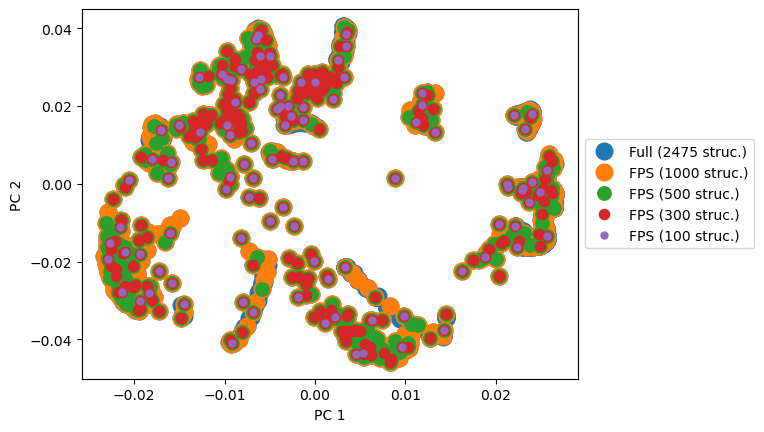

In [222]:
scaled_arr = scaler.fit_transform(arr.T)
pca.fit(scaled_arr)
x, y = pca.components_
ms = 12
plt.plot(x, y, 'o', markersize = ms, label = f'Full ({len(si_dataset)} struc.)') 
print(len(arr), pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_))

# for n_to_select in [500, 100, 10]:
nsel = [1000, 500, 300, 100]
for i, (n_to_select, ms_) in enumerate(zip(nsel, np.linspace(ms, 5, len(nsel)))):
    selector = FPS(n_to_select = n_to_select, initialize='random')
    selector.fit(scaled_arr.T)
    # print(n_to_select, pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_))
    plt.plot(x[selector.selected_idx_], y[selector.selected_idx_], 'o', label = f'FPS ({n_to_select} struc.)', alpha = 1, markersize = ms_) 

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))